In [45]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
class Perceptron:
    def __init__(self, lr, epoch, X):
        self.weights = np.random.randn(3)*1e-4  #returns a number randomly generated from normal distribution
        self.lr = lr
        self.epoch = epoch
        self.X = X
        self.X_with_bias = np.c_[X, np.ones((len(X),1))]
        self.Y = Y
        
    def actfunc(self, x_with_bias, weights):
        z = np.dot(x_with_bias, weights)
        z = np.where(z>0, 1, 0)
        return z
    
    def fit(self,Y):
        for epoch in range(self.epoch):
            yhat = self.actfunc(self.X_with_bias, self.weights)
            error = Y - yhat
            self.weights = self.weights + self.lr * np.dot(self.X_with_bias.T, error)
    
    def predict(self):
        return self.actfunc(self.X_with_bias, self.weights)

In [10]:
data = {"X1":[0,0,1,1], "X2": [0,1,0,1], "Y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND.head()

,X1,X2,Y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [13]:
X = AND.drop("Y", axis = 1)
Y = AND['Y']

In [41]:
percep = Perceptron(0.01, 100, X)
percep.fit(Y)
percep.predict()

array([0, 0, 0, 1])

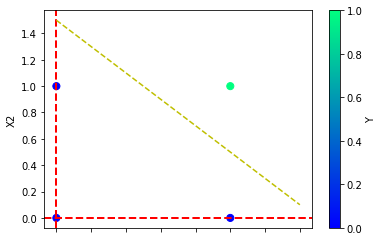

In [52]:
AND.plot(kind="scatter", x = "X1", y = "X2", c = "Y", cmap = "winter", s = 50)
plt.axhline(y=0, color = "red", linestyle = "--", linewidth = 2)
plt.axvline(x=0, color = "red", linestyle = "--", linewidth = 2)

plt.plot(np.linspace(0,1.4), 1.5 - np.linspace(0,1.4), "y--")

In [ ]:
filename = "And_model.model"
joblib.dump(model, filename)
